In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

pd.options.mode.chained_assignment = None

sns.set(color_codes=True)

%matplotlib inline

/Users/claus/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [3]:
f = 'numerai_datasets/numerai_training_data.csv'
d = pd.read_csv(f)

In [27]:
d.head()

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,...,c1_22,c1_23,c1_24,c1_3,c1_4,c1_5,c1_6,c1_7,c1_8,c1_9
0,134182390,97300587,135824563,90767607,87687197,65148427,109834029,131613166,135533479,92106582,...,0,1,0,0,0,0,0,0,0,0
1,76630357,132348601,78121737,102794263,120848626,128752983,71827456,95945691,98115812,135285479,...,0,0,0,1,0,0,0,0,0,0
2,111610401,132186734,83887688,120772423,133722193,100560251,69916843,100459177,80742177,134884316,...,0,0,0,0,0,0,0,0,0,0
3,72896251,113365043,72912608,126007508,127949612,74975809,87833921,68438705,76021871,116126096,...,0,0,0,1,0,0,0,0,0,0
4,113253706,96665624,89391907,77862818,91855586,100094204,116150057,114434231,98567673,86510339,...,0,0,0,0,0,1,0,0,0,0


In [26]:
c_cols = pd.get_dummies(d.c1)
d = d.join(c_cols)

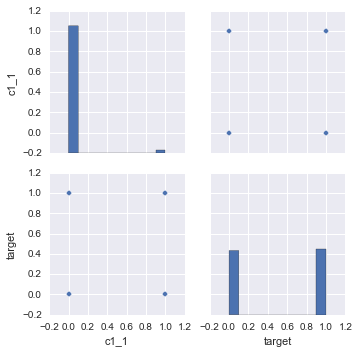

In [28]:
# g = sns.pairplot(d.iloc[:,:5])
g = sns.pairplot(d[['c1_1', 'target']])

In [30]:
validation = d[d.validation == 1]

In [31]:
len(validation)

14019

In [32]:
train = d[d.validation == 0]

In [33]:
len(train)

41019

In [76]:
cols = list(train.columns.get_values())
features = [x for x in cols if x not in ['c1', 'validation', 'target']]

In [82]:
X = train[features]
y = train['target']

In [85]:
from sklearn.preprocessing import StandardScaler

stdsc = StandardScaler()

X = pd.DataFrame(stdsc.fit_transform(X), columns=features)

In [86]:
print X.shape
print y.shape

(41019, 37)
(41019,)


In [87]:
from sklearn.cross_validation import cross_val_score
from sklearn.metrics import roc_curve, auc
from sklearn import metrics

#models
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV


In [88]:
model = LogisticRegressionCV(penalty='l2', class_weight='auto')

#fit on training data
fit = model.fit(X, y)

print 'C: ', model.Cs

# predict on test data
y_pred = model.predict(X)
accuracy = metrics.accuracy_score(y, y_pred)
print "Accuracy of model:\t", accuracy
print 'MSE\t', metrics.mean_squared_error(y, y_pred)
print 'RMSE\t', np.sqrt(metrics.mean_squared_error(y, y_pred))

score_train = model.score(X, y)

print '\n'
print '-----------------------------------------'
print 'Scores:'
print '-----------------------------------------'
print 'Train\t', score_train

C:  10
Accuracy of model:	0.526122041005
MSE	0.473877958995
RMSE	0.688387942221


-----------------------------------------
Scores:
-----------------------------------------
Train	0.526122041005


/Users/claus/anaconda/lib/python2.7/site-packages/sklearn/utils/class_weight.py:62: DeprecationWarning: The class_weight='auto' heuristic is deprecated in 0.17 in favor of a new heuristic class_weight='balanced'. 'auto' will be removed in 0.19
  " 0.19", DeprecationWarning)


In [89]:
print '\n'
print 'Coefficients for each X:\n'
coeff = pd.DataFrame(zip(features, model.coef_[0]), columns=['Feature', 'Weight'])
coeff['FeatureImportance'] = np.abs(coeff.Weight)/np.abs(coeff.Weight).sum()
coeff.sort_values(by='FeatureImportance', ascending=False)



Coefficients for each X:



,Feature,Weight,FeatureImportance
6,f7,0.048443,0.078520
12,f13,0.038046,0.061667
4,f5,-0.032898,0.053322
15,c1_10,0.032170,0.052143
8,f9,0.030186,0.048926
9,f10,0.028264,0.045812
22,c1_17,-0.025796,0.041812
0,f1,0.025317,0.041035
1,f2,0.022428,0.036352
2,f3,0.020958,0.033970


In [90]:
false_positive_rate, true_positive_rate, thresholds = metrics.roc_curve(y, y_pred)

thresholds: [2 1 0]
AUC: 0.525814518438


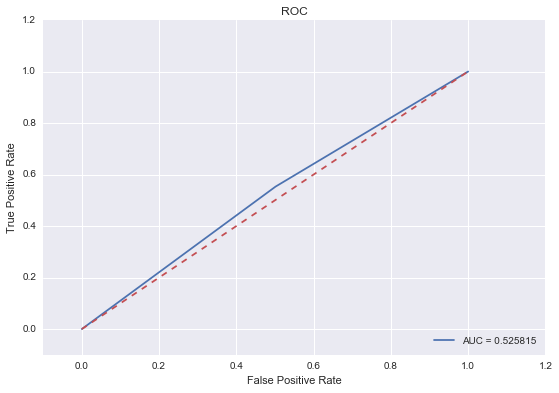

In [95]:
roc_auc = metrics.auc(false_positive_rate, true_positive_rate)
print "thresholds:", thresholds
print "AUC:", roc_auc

plt.figure(figsize=(9,6))
plt.title('ROC')
plt.plot(false_positive_rate, true_positive_rate, 'b', label='AUC = %0.6f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

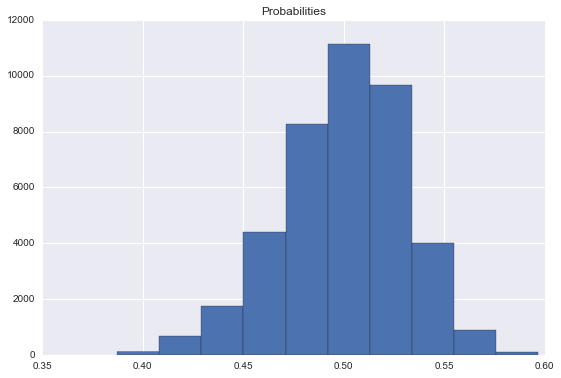

In [96]:
p = model.predict_proba(X)
f = plt.figure(figsize=(9,6))
plt.title('Probabilities')
ax = f.add_subplot(111)
ax.hist(p[:,1], bins=10)
plt.show()